In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 259.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 203.9 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 385.0 kB/s eta 0:00:000:00:01m eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 309.7 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB

  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498447 sha256=14a1c6052d8ce382504dbb884c1ee017845f6fb2f2975a13879317a14d6e77da
  Stored in directory: /home/durbar/.cache/pip/wheels/67/d8/8c/05507d30cc58cab62c405012c887ef3e6f4defa9b6d912a46d
  Created wheel for wrapt: filename=wrapt-1.14.1-cp311-cp311-linux_x86_64.whl size=76372 sha256=6d6183ce6f2be9187f63a704435836bf76715adf396bc4e7c75a6c8e8972e2d7
  Stored in directory: /home/durbar/.cache/pip/wheels/eb/b6/fa/5ab6f4107cad63fa04c54ad78d75bb7035119bdd4f751df5ae
Successfully built jax wrapt


In [4]:
import tensorflow as tf
import os


2023-06-17 22:47:49.071313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 22:47:49.108571: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 22:47:49.109178: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 22:47:50.022309: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)


2023-06-17 22:48:06.980072: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-17 22:48:06.980790: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
tf.config.list_physical_devices('GPU')

[]

In [12]:
!pip install opencv-python
import cv
import imghdr

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [13]:
data_dir = 'data' 

In [14]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [38]:
import imghdr

image_exts = ['jpeg', 'jpg', 'png']  # List of allowed image extensions

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            tip = imghdr.what(image_path)
            if tip is None or tip not in image_exts:
                print('Deleting image {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


Deleting image data/happy/happy_sunday_with_sun.jpg
Deleting image data/happy/depositphotos_1826896-stock-photo-enjoying-the-nature.jpg
Issue with image data/sad/.comments
Deleting image data/sad/sad9-1024x576.jpg


In [34]:
!pip install matplotlib
import numpy as np
from matplotlib import pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [39]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 225 files belonging to 2 classes.


In [40]:
data_iterator = data.as_numpy_iterator()

2023-06-18 02:46:59.870490: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [225]
	 [[{{node Placeholder/_4}}]]
2023-06-18 02:46:59.871140: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [225]
	 [[{{node Placeholder/_0}}]]


In [41]:
batch = data_iterator.next()

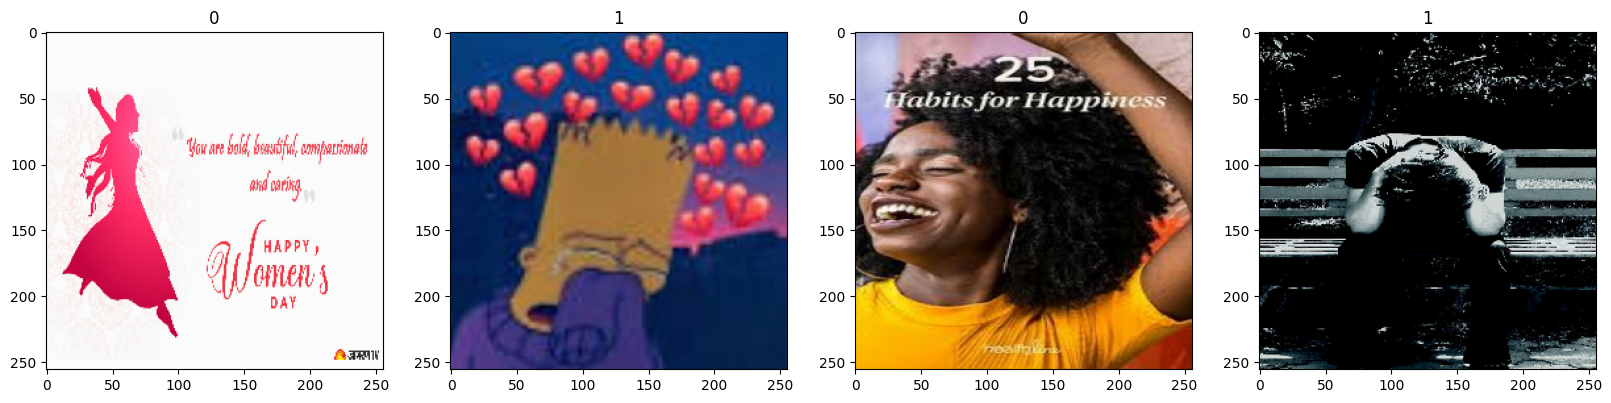

In [42]:


fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)


In [44]:
train_size

5

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [46]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:


model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-06-18 02:56:11.079464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [225]
	 [[{{node Placeholder/_4}}]]
2023-06-18 02:56:11.079730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [225]
	 [[{{node Placeholder/_4}}]]
2023-06-18 02:56:12.706124: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2023-06-18 02:56:13.121836: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


1/5 [=====>........................] - ETA: 10s - loss: 4.4391 - accuracy: 0.5625

2023-06-18 02:56:13.634305: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


2/5 [===========>..................] - ETA: 1s - loss: 167.2379 - accuracy: 0.6406

2023-06-18 02:56:14.015351: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.
2023-06-18 02:56:14.183175: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 132128768 exceeds 10% of free system memory.


5/5 [==============================] - ETA: 0s - loss: 107.0341 - accuracy: 0.5250

2023-06-18 02:56:15.900509: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [225]
	 [[{{node Placeholder/_4}}]]
2023-06-18 02:56:15.900945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [225]
	 [[{{node Placeholder/_4}}]]


5/5 [==============================] - 6s 838ms/step - loss: 107.0341 - accuracy: 0.5250 - val_loss: 19.2212 - val_accuracy: 0.4062
Epoch 2/20
5/5 [==============================] - 5s 804ms/step - loss: 7.0666 - accuracy: 0.6875 - val_loss: 2.2427 - val_accuracy: 0.6250
Epoch 3/20
5/5 [==============================] - 4s 747ms/step - loss: 2.5634 - accuracy: 0.6313 - val_loss: 3.5519 - val_accuracy: 0.7188
Epoch 4/20
5/5 [==============================] - 4s 727ms/step - loss: 1.5210 - accuracy: 0.7500 - val_loss: 0.5116 - val_accuracy: 0.8438
Epoch 5/20
5/5 [==============================] - 5s 772ms/step - loss: 0.3455 - accuracy: 0.8438 - val_loss: 0.1219 - val_accuracy: 0.9688
Epoch 6/20
5/5 [==============================] - 4s 750ms/step - loss: 0.3474 - accuracy: 0.8562 - val_loss: 0.3147 - val_accuracy: 0.9688
Epoch 7/20
5/5 [==============================] - 5s 800ms/step - loss: 0.2683 - accuracy: 0.8938 - val_loss: 0.2267 - val_accuracy: 0.9688
Epoch 8/20
5/5 [============

In [55]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [57]:


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)



2023-06-18 02:58:27.580021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [225]
	 [[{{node Placeholder/_0}}]]
2023-06-18 02:58:27.580989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [225]
	 [[{{node Placeholder/_4}}]]


In [58]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [61]:
val_loss, val_accuracy = model.evaluate(val)

val_precision = tf.keras.metrics.Precision()
val_recall = tf.keras.metrics.Recall()

for batch in val:
    X_val, y_val = batch
    y_val_pred = model.predict(X_val)
    val_precision.update_state(y_val, y_val_pred)
    val_recall.update_state(y_val, y_val_pred)

val_precision_value = val_precision.result().numpy()
val_recall_value = val_recall.result().numpy()

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)
print("Validation Precision:", val_precision_value)
print("Validation Recall:", val_recall_value)


1/1 [==============================] - 0s 144ms/step
Validation Loss: 0.02202850580215454
Validation Accuracy: 1.0
Validation Precision: 1.0
Validation Recall: 1.0


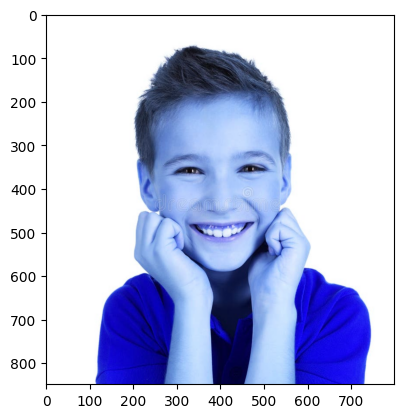

In [65]:
import cv2

img = cv2.imread('test_image.jpg')
plt.imshow(img)
plt.show()



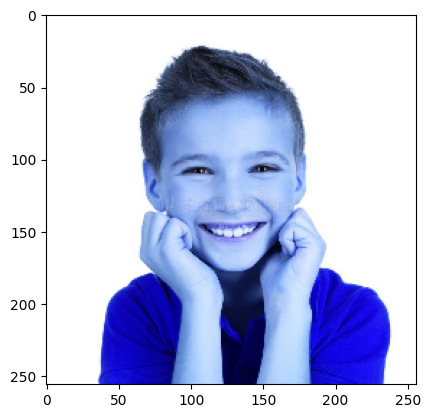

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [68]:
yhat

array([[0.4601772]], dtype=float32)

In [69]:


if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')



Predicted class is Happy


In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models','imageclassifier.h5'))

In [73]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [74]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined